Connect to Google Drive

In [ ]:
from google.colab import drive
import pandas as pd

# Mount to Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load final_df into df

In [ ]:
# Provide full path to final_df CSV file in Google Drive
final_df = '/content/drive/MyDrive/COMP 333/NBA-Data/final_df.csv'

# Load the CSV file into a DataFrame
final_df = pd.read_csv(final_df, sep=',')

final_df

,Player,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All-Star
0,Al Horford,204,C,30,BOS,68,68,32.3,5.6,11.8,...,5.4,6.8,5.0,0.8,1.3,1.7,2.0,14.0,2016-2017,True
1,Allan Houston,181,SG,28,NYK,82,82,38.6,7.5,15.5,...,2.8,3.3,2.7,0.8,0.2,2.3,2.7,19.7,1999-2000,True
2,Allen Iverson,203,SG,32,DEN,82,82,41.8,8.7,19.0,...,2.4,3.0,7.1,2.0,0.1,3.0,1.3,26.4,2007-2008,True
3,Alonzo Mourning,269,C,28,MIA,46,46,38.1,7.0,13.8,...,7.4,11.0,1.6,0.7,3.9,3.0,3.5,20.1,1998-1999,True
4,Amar'e Stoudemire,377,PF,27,PHO,82,82,34.6,8.6,15.4,...,6.1,8.9,1.0,0.6,1.0,2.6,3.4,23.1,2009-2010,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,ÃÂÃÂlex Abrines,1,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2017-2018,False
1481,ÃÂÃÂscar Torres,400,SG,25,HOU,65,13,16.5,2.1,5.2,...,1.2,1.9,0.6,0.4,0.1,0.8,1.0,6.0,2001-2002,False
1482,ÃÂ ÃÂ arÃÂ ÃÂ«nas JasikeviÃÂÃÂius,211,SG-PG,30,TOT,63,3,15.4,2.0,5.1,...,0.9,1.1,2.7,0.4,0.0,1.4,1.2,6.1,2006-2007,False
1483,ÃÂ ÃÂ½an Tabak,381,C,27,TOT,57,34,17.3,2.5,5.3,...,2.2,3.7,0.8,0.4,0.7,1.1,2.9,5.4,1997-1998,False


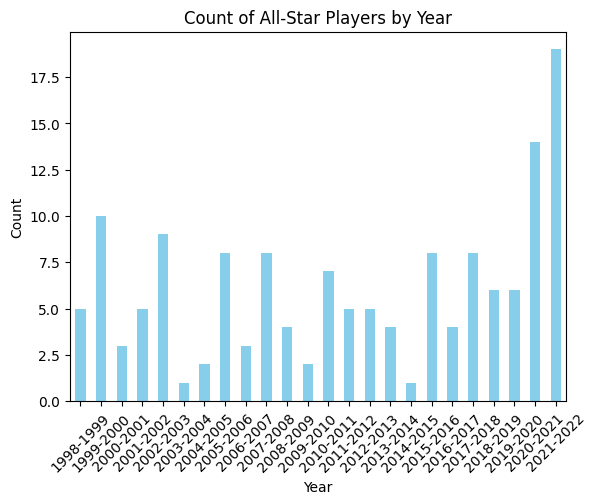

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Year' and count the number of All-Star players for each year
all_star_counts_by_year = final_df[final_df['All-Star'] == True].groupby('Year').size()

# Plot the counts
all_star_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Count of All-Star Players by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

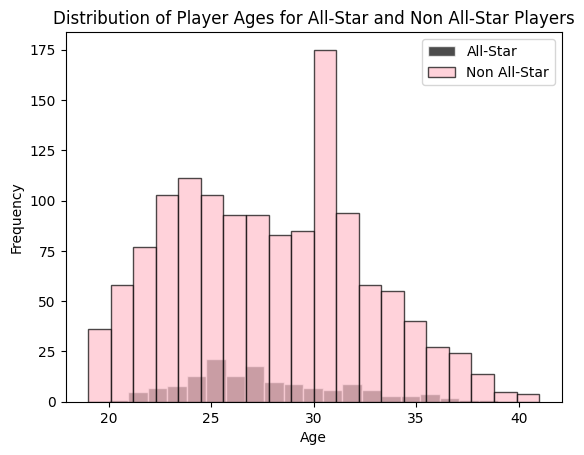

In [ ]:
import matplotlib.pyplot as plt

# Separate data for All-Star and non-All-Star players
all_star_ages = final_df[final_df['All-Star']]['Age']
non_all_star_ages = final_df[~final_df['All-Star']]['Age']

# Plot histograms for All-Star and non-All-Star players
plt.hist(all_star_ages, bins=20, color='black', edgecolor='white', alpha=0.7, label='All-Star')
plt.hist(non_all_star_ages, bins=20, color='pink', edgecolor='black', alpha=0.7, label='Non All-Star')

# Add titles and labels
plt.title('Distribution of Player Ages for All-Star and Non All-Star Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

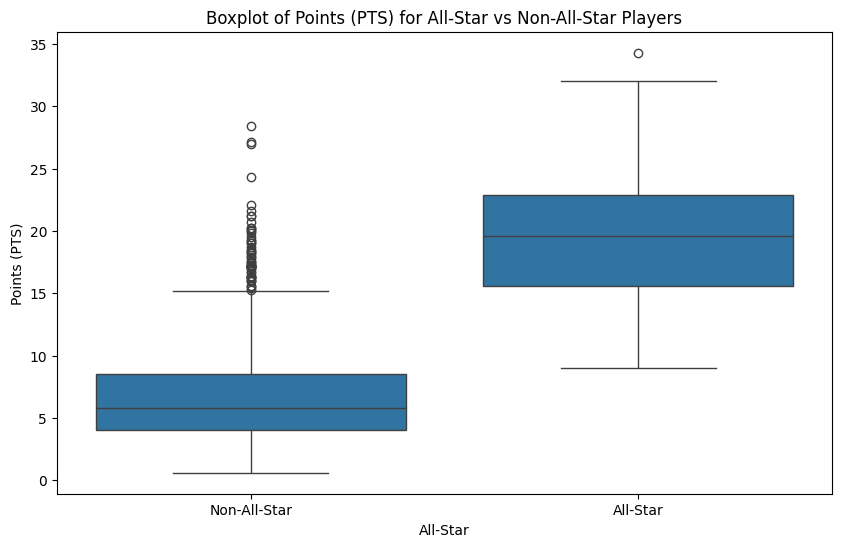

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for All-Star players and non-All-Star players
plt.figure(figsize=(10, 6))
sns.boxplot(x='All-Star', y='PTS', data=final_df)
plt.title('Boxplot of Points (PTS) for All-Star vs Non-All-Star Players')
plt.xlabel('All-Star')
plt.ylabel('Points (PTS)')
plt.xticks([0, 1], ['Non-All-Star', 'All-Star'])
plt.show()

In [ ]:
import plotly.express as px

# Group by team and count the number of All-Star players
team_all_star_count = final_df.groupby('Tm')['All-Star'].sum().reset_index()

# Sort the teams by the number of All-Star players
team_all_star_count_sorted = team_all_star_count.sort_values(by='All-Star', ascending=False)

# Plot the result
fig = px.bar(team_all_star_count_sorted, x='Tm', y='All-Star', title='Number of All-Star Players by Team')
fig.update_xaxes(title='Team')
fig.update_yaxes(title='Number of All-Star Players')

# Show the plot
fig.show()

In [ ]:
# Install Dash and ngrok
!pip install dash

In [ ]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import pandas as pd
import plotly.io as pio

data = {
    'MP': final_df['MP'],
    'FGA': final_df['FGA'],
    '3P': final_df['3P'],
    '2P': final_df['2P'],
    'FT': final_df['FT'],
    'ORB': final_df['ORB'],
    'DRB': final_df['DRB'],
    'TRB': final_df['TRB'],
    'AST': final_df['AST'],
    'STL': final_df['STL'],
    'BLK': final_df['BLK'],
    'TOV': final_df['TOV'],
    'PF': final_df['PF'],
    'PTS': final_df['PTS'],
    'Age': final_df['Age'],
    'All-Star': final_df['All-Star'],
}

df = pd.DataFrame(data)

# Create Dash app
app = dash.Dash(__name__)

# Calculate average values for each attribute by All-Star status
avg_all_star = df[df['All-Star'] == True].mean()
avg_non_all_star = df[df['All-Star'] == False].mean()

# Create visualizations
fig1 = go.Figure()

# Add bar trace for All-Star players
fig1.add_trace(go.Bar(x=avg_all_star.index, y=avg_all_star.values, name='All-Star Players', marker_color='pink'))

# Add bar trace for non-All-Star players
fig1.add_trace(go.Bar(x=avg_non_all_star.index, y=avg_non_all_star.values, name='Non All-Star Players', marker_color='royalblue'))

# Create a scatter plot for assists vs points
ast_vs_pts_scatter = go.Scatter(x=df['AST'], y=df['PTS'], mode='markers', marker=dict(color=df['All-Star'].map({True: 'pink', False: 'royalblue'})))

# Create a scatter plot for rebounds vs points
reb_vs_pts_scatter = go.Scatter(x=df['TRB'], y=df['PTS'], mode='markers', marker=dict(color=df['All-Star'].map({True: 'pink', False: 'royalblue'})))


# Calculate average age for All-Star and non-All-Star players
avg_age_all_star = df[df['All-Star'] == True]['Age'].mean()
avg_age_non_all_star = df[df['All-Star'] == False]['Age'].mean()

print(avg_age_all_star, avg_age_non_all_star)
# Create bar chart
fig2 = go.Figure()

# Add bar trace for average age of All-Star players and non-All-Star players
fig2.add_trace(go.Bar(x=['All-Star', 'Non All-Star'], y=[avg_age_all_star, avg_age_non_all_star], name='Average Age', marker_color=['pink', 'royalblue']))

# Add axis titles to the figures
fig1.update_layout(
    title='Average Stats of All-Star and Non All-Star Players',
    xaxis_title='Attribute',
    yaxis_title='Average Value'
)

fig2.update_layout(
    title='Average Age of All-Star and Non All-Star Players',
    xaxis_title='Player Type',
    yaxis_title='Average Age'
)

# Define layout
app.layout = html.Div([
    html.H1('Comparison of All-Star vs Non All-Star Players'),

    html.Div([
        dcc.Graph(figure=fig1),
    ], className='six columns'),

    html.Div([
        dcc.Graph(figure=fig2)
    ], className='six columns'),

    html.Div([
        dcc.Graph(
            id='ast-vs-pts-scatter',
            figure={
                'data': [ast_vs_pts_scatter],
                'layout': {
                'title': 'Assists vs Points',
                'xaxis': {'title': 'Assists'},
                'yaxis': {'title': 'Points'}
                }
            }
        )
    ], className='six columns'),

    # Scatter plot comparing rebounds with points
    html.Div([
        dcc.Graph(
            id='reb-vs-pts-scatter',
            figure={
                'data': [reb_vs_pts_scatter],
                'layout': {
                'title': 'Rebounds vs Points',
                'xaxis': {'title': 'Rebounds'},
                'yaxis': {'title': 'Points'}
                }
            }
        )
    ], className='six columns'),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

27.54421768707483 27.825859491778775


<IPython.core.display.Javascript object>